# Pancreas

In [1]:
%load_ext autoreload
%load_ext autotime

import os
import glob
import random
import sys
import math
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


time: 792 ms (started: 2022-05-13 17:37:20 -05:00)


In [2]:
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time

time: 2.77 s (started: 2022-05-13 17:37:21 -05:00)


## Set Parameters

In [140]:
n_neighbors=200
downsample_step=(100,100)

time: 1.64 ms (started: 2022-05-17 16:13:22 -05:00)


## Load detail

In [4]:
detail_result_path = '/Users/pengzhizhang/pseudotime/data/pancreas/velocity_result'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
load_cellDancer=pd.read_csv(detail_file)

time: 9.14 s (started: 2022-05-13 17:37:29 -05:00)


## Visualize gene velocity

In [5]:
xlim = (-15, 15)
ylim = (-10, 10)

time: 1.35 ms (started: 2022-05-13 17:37:38 -05:00)


In [152]:
%autoreload 2

gene_choice=list(set(load_cellDancer.gene_name))
load_cellDancer = compute_cell_velocity(
    load_cellDancer=load_cellDancer,
    gene_list=gene_choice,
    mode="embedding",
    transfer_mode=None,
    n_neighbors=n_neighbors,
    step=None)

(genes, cells): (2000, 3696)
Caution! Overwriting the 'velocity' columns.
After downsampling, there are  3696 cells.
time: 4min 1s (started: 2022-05-18 12:07:22 -05:00)


In [153]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,pseudotime,alpha_beta_gamma_umap1,alpha_beta_gamma_umap2,velocity1,velocity2
0,0,2010107G23Rik,0.645871,0.000000,0.631752,0.000444,0.004090,0.033074,0.143236,0.085577,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644,0.913924,8.922098,13.129356,0.093571,0.172463
1,1,2010107G23Rik,0.659958,0.050844,0.667935,0.049499,0.002315,0.013641,0.159593,0.085577,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778,0.488989,12.970846,-3.634279,-0.146441,-0.251070
2,2,2010107G23Rik,0.536477,0.031027,0.543241,0.030047,0.002852,0.018068,0.154822,0.085577,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762,0.929726,6.813724,15.566797,0.098305,0.415870
3,3,2010107G23Rik,0.172749,0.000000,0.168829,0.000422,0.003884,0.025258,0.148675,0.085577,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998,0.070562,5.904807,-4.386752,-0.005820,0.170926
4,4,2010107G23Rik,2.669759,0.024144,2.671663,0.020978,0.003705,0.064247,0.127344,0.085577,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407,0.753353,13.156005,8.326236,0.221076,0.090824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391995,3691,Zfp949,0.175796,0.175190,0.163429,0.174457,0.209083,0.203498,0.271190,0.043265,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353,0.878670,9.121659,12.999917,0.266844,0.056683
7391996,3692,Zfp949,0.078194,0.130215,0.086273,0.142232,0.216891,0.203658,0.268408,0.043265,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650,0.677670,12.814433,4.767254,0.244415,-0.056063
7391997,3693,Zfp949,0.000000,0.044002,0.011225,0.076212,0.210932,0.204190,0.266029,0.043265,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594,0.499515,9.807837,-4.607297,-0.065493,-0.085409
7391998,3694,Zfp949,0.041343,0.086365,0.050158,0.108793,0.214619,0.203931,0.267263,0.043265,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895,0.997132,4.989841,17.349808,0.337532,0.372194


time: 51.8 ms (started: 2022-05-18 12:38:04 -05:00)


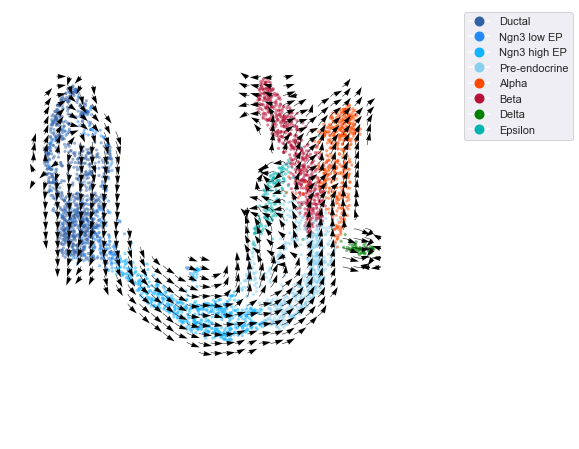

time: 7.61 s (started: 2022-05-18 12:39:44 -05:00)


In [154]:
%autoreload 2

fig, ax = plt.subplots(figsize=(8,8))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_pancreas, alpha=0.5, s=10,
             gene_name=None, velocity=True, custom_xlim=xlim, custom_ylim=ylim, legend='on')
ax.axis('off')
plt.show()

In [16]:
%%script echo skipping for now
gene_list=['Dcx','Rimbp2','Dctn3','Psd3','Ntrk2',
           'Pfkp','Gnao1','Ncald','Klf7','Slc4a10',
           'Nav1','Elavl4','Gpc6','Cdh13','Ppfia2']


ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

skipping for now
time: 38.8 ms (started: 2022-05-05 17:16:51 -05:00)


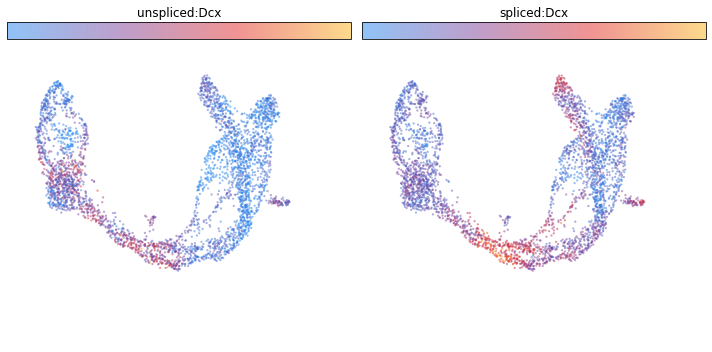

time: 1.56 s (started: 2022-05-09 11:00:48 -05:00)


In [9]:
%autoreload 2

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
gene = 'Dcx'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim, colorbar='on')
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim, colorbar='on')

ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('unspliced:'+gene)
ax[1].set_title('spliced:'+gene)
plt.tight_layout()
plt.show()

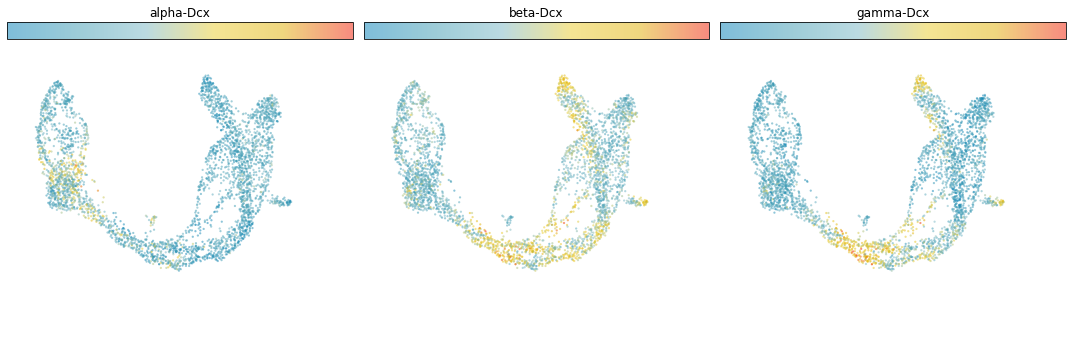

time: 2.2 s (started: 2022-05-09 11:00:54 -05:00)


In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
gene = 'Dcx'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim)
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim)
im2=cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
plt.tight_layout()
plt.show()

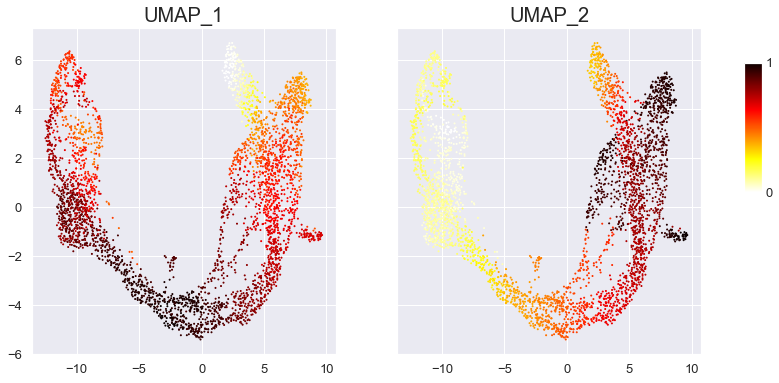

time: 284 ms (started: 2022-05-16 12:51:52 -05:00)


In [65]:

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

im1=axes[0].scatter(x=embedding[:,0], y=embedding[:,1], 
                    c=normalized_abr_umap[:,0], cmap='hot_r', alpha=1, vmin=0, vmax=1, s=1)

im2=axes[1].scatter(x=embedding[:,0], y=embedding[:,1], 
                    c=normalized_abr_umap[:,1], cmap='hot_r', alpha=1, vmin=0, vmax=1, s=1)

axes[0].tick_params(axis='x', labelsize=13)
axes[0].tick_params(axis='y', labelsize=13)
axes[1].tick_params(axis='x', labelsize=13)
axes[1].tick_params(axis='y', labelsize=13)


cax = plt.axes([0.95, 0.5, 0.02, 0.3])
cbar = fig.colorbar(im2, cax=cax, ticks=[0,1])

axes[0].set_title("UMAP_1", fontdict = {'size':20})
axes[1].set_title("UMAP_2", fontdict = {'size':20})

cax.tick_params(axis='y', labelsize=13, size=0)
cax.set_yticklabels(['0', '1'])

#plt.savefig("umap_on_embedding.pdf")
plt.show()

In [54]:
%autoreload 2
from celldancer.diffusion import embedding_normalization, velocity_normalization, generate_grid, compute_path_divider_matrix

gene_choice = load_cellDancer[~load_cellDancer['velocity1'].isna()]['gene_name']
gene_choice = gene_choice.drop_duplicates()
one_gene = gene_choice.to_list()[0]
embedding = load_cellDancer[load_cellDancer['gene_name'] ==
        one_gene][['embedding1', 'embedding2']]
embedding = embedding.to_numpy()

# This could be problematic if it's not in the gene_choice
velocity_embedding = load_cellDancer[load_cellDancer.gene_name ==
        one_gene][['velocity1', 'velocity2']].dropna()
sampling_ixs = velocity_embedding.index

cell_embedding, normalized_embedding = embedding_normalization(
    embedding[sampling_ixs], embedding, mode='minmax', NORM_ALL_CELLS=True)
velocity = velocity_normalization(velocity_embedding, mode='max')

abr_umap = load_cellDancer[load_cellDancer['gene_name'] ==
                one_gene][['alpha_beta_gamma_umap1', 'alpha_beta_gamma_umap2']]
_, normalized_abr_umap = embedding_normalization(
                abr_umap.loc[sampling_ixs], abr_umap, mode='minmax', NORM_ALL_CELLS=True)


__ = generate_grid(cell_embedding, normalized_embedding,
        velocity, normalized_abr_umap, steps=grid)

vel_mesh = __[0]
grid_mass = __[1]
grid_umap = __[2]
cell_grid_idx = __[3]
cell_grid_coor = __[4]
all_grid_idx = __[5]
all_grid_coor = __[6]


fmat = grid_umap
ngrids = fmat.shape[:-1]
flat_length = np.multiply(*ngrids)
temp = fmat.reshape(flat_length, fmat.shape[-1])

temp2 = temp-temp[:,None]
temp2 = np.linalg.norm(temp2, axis=-1)


#path_divider_matrix = compute_path_divider_matrix(grid_umap, cutoff=0.1)

time: 1.24 s (started: 2022-05-16 12:24:56 -05:00)


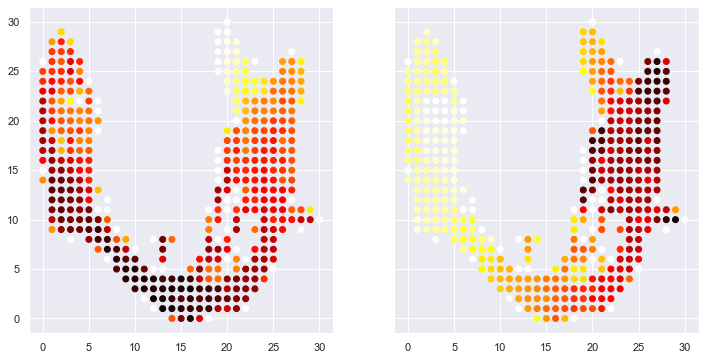

time: 235 ms (started: 2022-05-16 12:35:02 -05:00)


In [60]:
import matplotlib.pylab as plt

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)


x=list()
y=list()
vx=list()
vy=list()
for i in range(grid_umap.shape[0]):
    for j in range(grid_umap.shape[1]):
        x.append(i)
        y.append(j)
        vx.append(grid_umap[i,j][0])
        vy.append(grid_umap[i,j][1])
axes[0].scatter(x,y, c=vx, cmap='hot_r')
axes[1].scatter(x,y, c=vy, cmap='hot_r')

plt.show()

## Estimate pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 36960/36960 [00:22<00:00, 1614.95it/s]


There are 4 clusters.
[0 1 2 3]


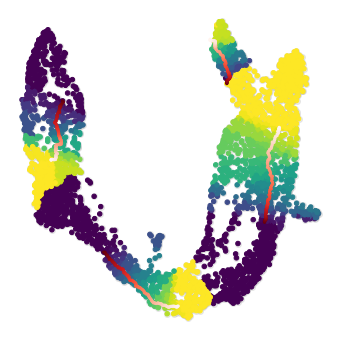




Cluster  0
Total cells in the cluster:  1730
MAX allowed zero time cells:  86
MAX allowed terminal cells:  86
433  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 4330/4330 [00:08<00:00, 495.20it/s]





Cluster  0
Total cells in the cluster:  433
MAX allowed zero time cells:  86
MAX allowed terminal cells:  86
Only  9  zero cells left. 
[798, 830, 866, 1055, 1219, 1334, 2133, 2838, 3377]
Only  49  terminal cells left.
[66, 83, 204, 243, 267, 279, 588, 638, 668, 680, 781, 955, 1057, 1194, 1378, 1410, 1444, 1454, 1618, 1764, 1772, 1784, 1893, 1910, 2079, 2090, 2198, 2345, 2349, 2456, 2477, 2520, 2594, 2733, 2776, 2793, 2807, 2825, 2901, 2966, 3011, 3015, 3171, 3211, 3270, 3378, 3452, 3523, 3633]
483  terminal cells left.
Sample trajs for terminal cells in cluster  0  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 4830/4830 [00:09<00:00, 497.80it/s]





Cluster  0
Total cells in the cluster:  483
MAX allowed zero time cells:  86
MAX allowed terminal cells:  86
Only  16  zero cells left. 
[76, 426, 440, 620, 646, 734, 897, 2052, 2546, 2548, 2581, 2711, 2861, 3029, 3231, 3338]
Only  3  terminal cells left.
[17, 190, 1834]
number of paths:  3 3

Display reference paths for cluster 0


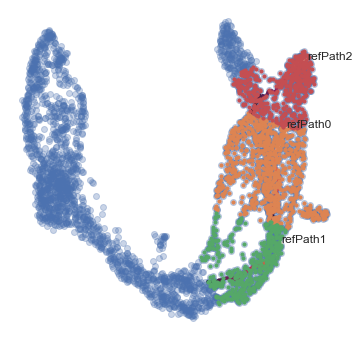


intercluster cell time adjustment
number of cells:  1730
Cutoff is  0.03742870670491814
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (1040, 668)
pair_cellIDs:  (2191, 3378)
pair_cellIDs:  (1448, 781)
pair_cellIDs:  (2065, 2477)
pair_cellIDs:  (2273, 1292)
pair_cellIDs:  (3140, 955)
pair_cellIDs:  (23, 279)
pair_cellIDs:  (2276, 2100)
pair_cellIDs:  (3105, 1910)
pair_cellIDs:  (3030, 2807)
pair_cellIDs:  (2107, 3452)
pair_cellIDs:  (1577, 1194)
pair_cellIDs:  (3491, 2901)
pair_cellIDs:  (1493, 3560)
pair_cellIDs:  (3166, 1444)
pair_cellIDs:  (983, 588)
pair_cellIDs:  (1760, 3523)
pair_cellIDs:  (2269, 3015)
pair_cellIDs:  (3096, 1291)
pair_cellIDs:  (3691, 3171)
pair_cellIDs:  (2159, 1057)
pair_cellIDs:  (1571, 1378)
pair_cellIDs:  (2371, 1454)
pair_cellIDs:  (3562, 534)
pair_cellIDs:  (1012, 638)
pair_cellIDs:  (1544, 292)
pair_cellIDs:  (407, 83)
pair_cellIDs:  (1997, 2345)
pair_cellIDs:  (1749, 243)
pair_cellIDs:  (185

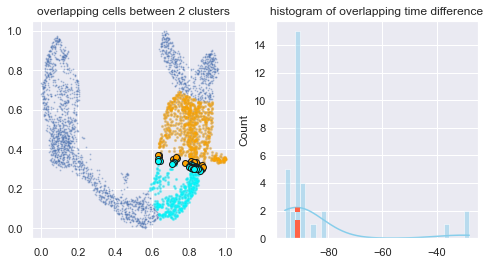

Time shift is:  -92
The overlapping cells are: 
cell  1448  from cluster  0  and  781  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (1318, 2546)
pair_cellIDs:  (802, 426)
pair_cellIDs:  (573, 944)
pair_cellIDs:  (1122, 440)
pair_cellIDs:  (1306, 897)
pair_cellIDs:  (1646, 1641)
pair_cellIDs:  (399, 620)
pair_cellIDs:  (3319, 646)
pair_cellIDs:  (3431, 2162)
pair_cellIDs:  (1089, 734)
pair_cellIDs:  (639, 1961)
pair_cellIDs:  (1372, 308)
pair_cellIDs:  (2260, 2581)
pair_cellIDs:  (2389, 2548)
pair_cellIDs:  (3098, 2861)
pair_cellIDs:  (3180, 3029)
pair_cellIDs:  (3069, 76)
pair_cellIDs:  (32, 785)
pair_cellIDs:  (1341, 953)
pair_cellIDs:  (3344, 2711)
pair_cellIDs:  (2651, 1546)
pair_cellIDs:  (3666, 1854)
pair_cellIDs:  (1513, 2525)
pair_cellIDs:  (1752, 3338)
pair_cellIDs:  (2148, 2796)
pair_cellIDs:  (233, 2052)
pair_cellIDs:  (1548, 3125)
pair_cellIDs:  (1068, 2218)
pair_cellIDs:  (2258, 2339)
pair_cellIDs:  (3252, 2498)
pair_cellIDs:  (2991, 31

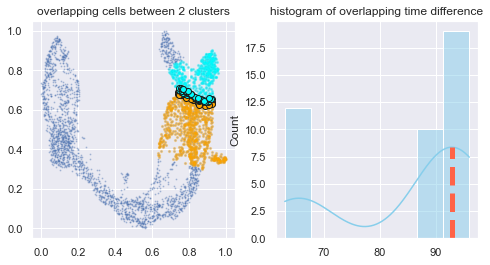

Time shift is:  93
The overlapping cells are: 
cell  3666  from cluster  0  and  1854  from cluster  2

Consolidating time between clusters  1  and  2 ...
No close cells between clusters	 (1, 2)


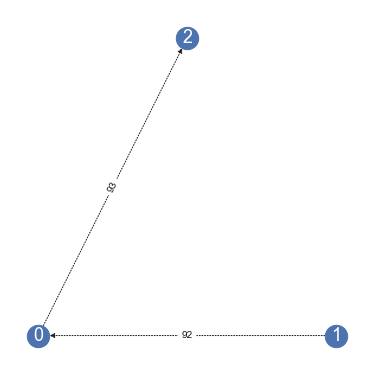

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: -92, 2: 93}



Cluster  1
Total cells in the cluster:  983
MAX allowed zero time cells:  49
MAX allowed terminal cells:  49
438  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 4380/4380 [00:09<00:00, 458.58it/s]





Cluster  1
Total cells in the cluster:  438
MAX allowed zero time cells:  49
MAX allowed terminal cells:  49
Only  1  terminal cells left.
[3574]
226  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 2260/2260 [00:08<00:00, 262.01it/s]





Cluster  1
Total cells in the cluster:  226
MAX allowed zero time cells:  49
MAX allowed terminal cells:  49
Only  1  zero cells left. 
[3326]
Only  11  terminal cells left.
[245, 1412, 1913, 1955, 2091, 2614, 2685, 3117, 3173, 3416, 3658]
184  terminal cells left.
Sample trajs for terminal cells in cluster  1  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1840/1840 [00:08<00:00, 212.47it/s]





Cluster  1
Total cells in the cluster:  184
MAX allowed zero time cells:  49
MAX allowed terminal cells:  49
Only  3  zero cells left. 
[67, 259, 787]
Only  27  terminal cells left.
[58, 134, 145, 169, 195, 559, 578, 790, 804, 1108, 1231, 1300, 1333, 1659, 1715, 1722, 1973, 2088, 2416, 2713, 2987, 3102, 3174, 3308, 3371, 3522, 3654]
number of paths:  4 4

Display reference paths for cluster 1


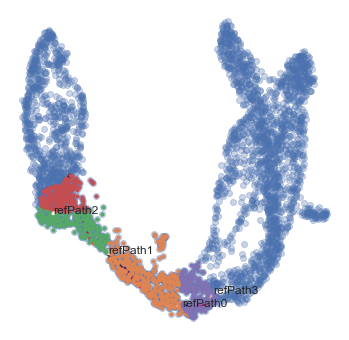


intercluster cell time adjustment
number of cells:  983
Cutoff is  0.023603811093609144
Number of nodes:  4
clusterIDs:  [0, 1, 2, 3]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (2576, 3574)
pair_cellIDs:  (155, 1265)
pair_cellIDs:  (2333, 1727)
pair_cellIDs:  (2702, 2296)
pair_cellIDs:  (1751, 300)

Peak mode:  most_frequent_shift


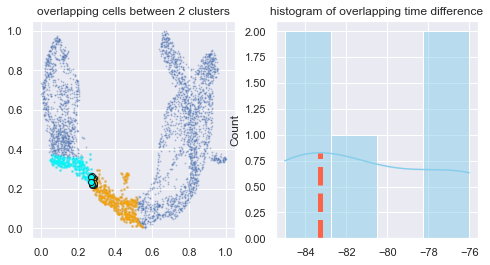

Time shift is:  -84
The overlapping cells are: 
cell  155  from cluster  0  and  1265  from cluster  1

Consolidating time between clusters  0  and  2 ...
No close cells between clusters	 (0, 2)

Consolidating time between clusters  0  and  3 ...
pair_cellIDs:  (157, 69)
pair_cellIDs:  (1229, 1359)
pair_cellIDs:  (1557, 385)
pair_cellIDs:  (3687, 3169)
pair_cellIDs:  (2769, 656)
pair_cellIDs:  (3527, 623)
pair_cellIDs:  (2170, 787)
pair_cellIDs:  (3644, 259)
pair_cellIDs:  (1218, 2612)
pair_cellIDs:  (1690, 2256)
pair_cellIDs:  (439, 2393)
pair_cellIDs:  (706, 557)
pair_cellIDs:  (54, 2699)
pair_cellIDs:  (2062, 2364)
pair_cellIDs:  (1475, 67)
pair_cellIDs:  (2570, 1015)
pair_cellIDs:  (2758, 185)
pair_cellIDs:  (1085, 1976)
pair_cellIDs:  (181, 3209)
pair_cellIDs:  (3227, 2959)
pair_cellIDs:  (2597, 1075)
pair_cellIDs:  (1634, 1142)
pair_cellIDs:  (713, 740)
pair_cellIDs:  (1626, 501)
pair_cellIDs:  (848, 1561)

Peak mode:  most_frequent_shift


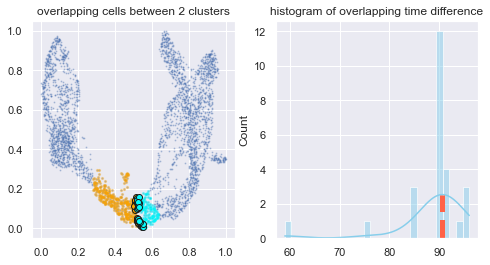

Time shift is:  91
The overlapping cells are: 
cell  1085  from cluster  0  and  1976  from cluster  3

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (546, 1538)
pair_cellIDs:  (286, 1946)
pair_cellIDs:  (2675, 1521)
pair_cellIDs:  (209, 3170)
pair_cellIDs:  (969, 3416)
pair_cellIDs:  (2847, 2969)
pair_cellIDs:  (1812, 3173)
pair_cellIDs:  (1358, 3658)
pair_cellIDs:  (3561, 737)
pair_cellIDs:  (3092, 2614)
pair_cellIDs:  (3256, 245)
pair_cellIDs:  (874, 3336)
pair_cellIDs:  (828, 3218)
pair_cellIDs:  (1311, 626)
pair_cellIDs:  (1977, 1587)
pair_cellIDs:  (3237, 1915)
pair_cellIDs:  (2720, 260)
pair_cellIDs:  (1688, 1589)
pair_cellIDs:  (108, 1412)
pair_cellIDs:  (1663, 696)
pair_cellIDs:  (2214, 1913)
pair_cellIDs:  (2770, 3521)
pair_cellIDs:  (2022, 705)
pair_cellIDs:  (999, 2342)
pair_cellIDs:  (2139, 1059)
pair_cellIDs:  (1828, 3468)
pair_cellIDs:  (3224, 3438)
pair_cellIDs:  (173, 2373)
pair_cellIDs:  (3630, 1955)

Peak mode:  most_frequent_shift


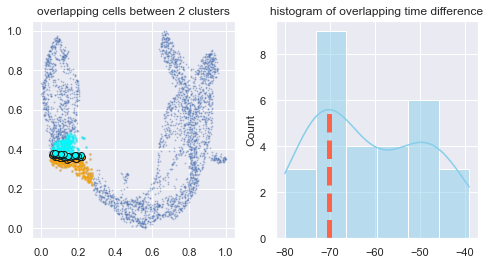

Time shift is:  -71
The overlapping cells are: 
cell  209  from cluster  1  and  3170  from cluster  2

Consolidating time between clusters  1  and  3 ...
No close cells between clusters	 (1, 3)

Consolidating time between clusters  2  and  3 ...
No close cells between clusters	 (2, 3)


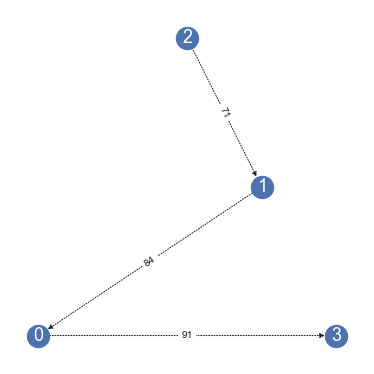

Connected components:  {0, 1, 2, 3}
All nodes adjustment:  {0: 0, 1: -84, 2: -155, 3: 91}



Cluster  2
Total cells in the cluster:  795
MAX allowed zero time cells:  39
MAX allowed terminal cells:  39
241  zero cells left.
Sample trajs for zero-time cells in cluster  2   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 2410/2410 [00:08<00:00, 267.81it/s]





Cluster  2
Total cells in the cluster:  241
MAX allowed zero time cells:  39
MAX allowed terminal cells:  39
Only  5  zero cells left. 
[494, 731, 1112, 2160, 2994]
98  terminal cells left.
Sample trajs for terminal cells in cluster  2  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 980/980 [00:08<00:00, 121.32it/s]





Cluster  2
Total cells in the cluster:  98
MAX allowed zero time cells:  39
MAX allowed terminal cells:  39
Only  4  zero cells left. 
[335, 1103, 1125, 2208]
Only  34  terminal cells left.
[36, 489, 550, 586, 748, 922, 947, 1077, 1167, 1197, 1238, 1700, 1730, 1783, 1813, 1860, 1942, 2078, 2089, 2097, 2168, 2259, 2408, 2529, 2683, 2686, 2718, 2935, 3040, 3133, 3273, 3417, 3479, 3679]
132  terminal cells left.
Sample trajs for terminal cells in cluster  2  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:08<00:00, 155.72it/s]





Cluster  2
Total cells in the cluster:  132
MAX allowed zero time cells:  39
MAX allowed terminal cells:  39
Only  8  zero cells left. 
[302, 328, 421, 1389, 1408, 2443, 3182, 3613]
Only  1  terminal cells left.
[182]
number of paths:  4 4

Display reference paths for cluster 2


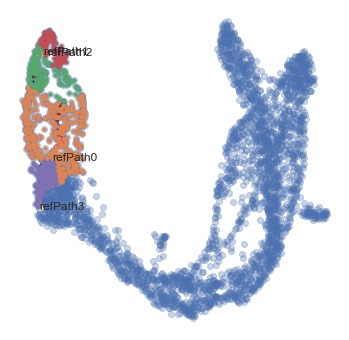


intercluster cell time adjustment
number of cells:  795
Cutoff is  0.029319906669070823
Number of nodes:  4
clusterIDs:  [0, 1, 2, 3]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (1798, 1112)
pair_cellIDs:  (326, 2160)
pair_cellIDs:  (2779, 2571)
pair_cellIDs:  (2944, 2042)
pair_cellIDs:  (2855, 494)
pair_cellIDs:  (1340, 518)
pair_cellIDs:  (820, 2413)
pair_cellIDs:  (272, 3665)
pair_cellIDs:  (3459, 561)
pair_cellIDs:  (372, 1606)
pair_cellIDs:  (98, 731)
pair_cellIDs:  (1887, 2654)
pair_cellIDs:  (693, 1665)
pair_cellIDs:  (3146, 542)
pair_cellIDs:  (2049, 3423)
pair_cellIDs:  (1380, 635)
pair_cellIDs:  (395, 606)
pair_cellIDs:  (568, 1872)
pair_cellIDs:  (1899, 584)
pair_cellIDs:  (1205, 60)
pair_cellIDs:  (655, 2994)

Peak mode:  most_frequent_shift


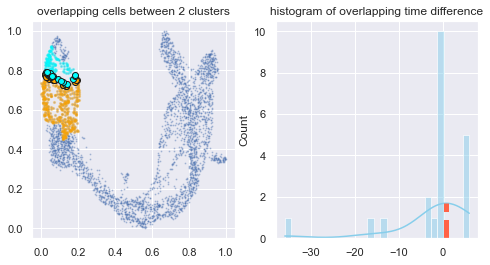

Time shift is:  0
The overlapping cells are: 
cell  2944  from cluster  0  and  2042  from cluster  1

Consolidating time between clusters  0  and  2 ...
No close cells between clusters	 (0, 2)

Consolidating time between clusters  0  and  3 ...
pair_cellIDs:  (3333, 2437)
pair_cellIDs:  (1652, 2544)
pair_cellIDs:  (3499, 1807)
pair_cellIDs:  (2952, 3567)
pair_cellIDs:  (3188, 1814)
pair_cellIDs:  (368, 3410)
pair_cellIDs:  (2953, 1934)
pair_cellIDs:  (768, 302)
pair_cellIDs:  (2374, 1537)
pair_cellIDs:  (1, 2070)
pair_cellIDs:  (2785, 672)
pair_cellIDs:  (1405, 265)
pair_cellIDs:  (2291, 1408)
pair_cellIDs:  (547, 3372)
pair_cellIDs:  (2352, 3613)
pair_cellIDs:  (3306, 229)
pair_cellIDs:  (3041, 435)
pair_cellIDs:  (666, 1460)
pair_cellIDs:  (2487, 752)
pair_cellIDs:  (3226, 1711)
pair_cellIDs:  (2037, 328)
pair_cellIDs:  (3611, 2634)
pair_cellIDs:  (2763, 2859)
pair_cellIDs:  (3234, 352)
pair_cellIDs:  (2113, 1288)
pair_cellIDs:  (2958, 3312)
pair_cellIDs:  (401, 2240)
pair_cellIDs: 

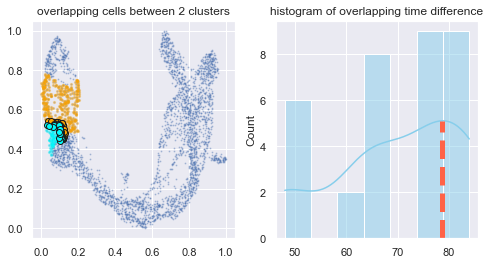

Time shift is:  78
The overlapping cells are: 
cell  3041  from cluster  0  and  435  from cluster  3

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (3345, 1783)
pair_cellIDs:  (1239, 2249)
pair_cellIDs:  (1116, 973)
pair_cellIDs:  (3564, 36)
pair_cellIDs:  (3158, 3657)
pair_cellIDs:  (1114, 2695)
pair_cellIDs:  (1393, 3149)
pair_cellIDs:  (144, 1203)
pair_cellIDs:  (1925, 3506)
pair_cellIDs:  (1029, 3479)
pair_cellIDs:  (1642, 1167)
pair_cellIDs:  (53, 464)
pair_cellIDs:  (1316, 875)
pair_cellIDs:  (500, 3156)
pair_cellIDs:  (1534, 947)
pair_cellIDs:  (1609, 3040)
pair_cellIDs:  (13, 2408)
pair_cellIDs:  (1847, 3417)
pair_cellIDs:  (917, 3010)
pair_cellIDs:  (2441, 1077)

Peak mode:  most_frequent_shift


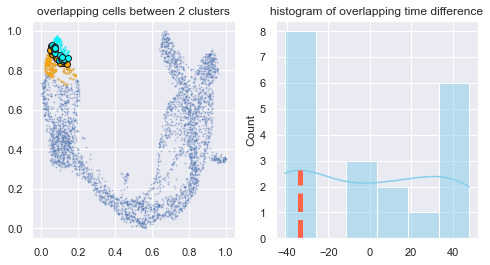

Time shift is:  0
The overlapping cells are: 
cell  3345  from cluster  1  and  1783  from cluster  2

Consolidating time between clusters  1  and  3 ...
No close cells between clusters	 (1, 3)

Consolidating time between clusters  2  and  3 ...
No close cells between clusters	 (2, 3)


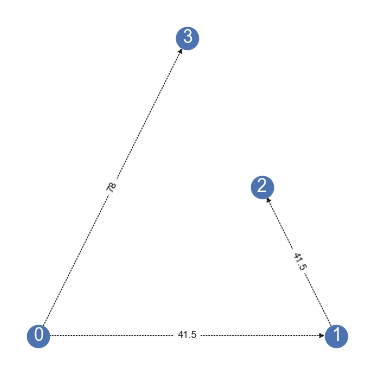

Connected components:  {0, 1, 2, 3}
All nodes adjustment:  {0: 0, 1: 0, 2: 0, 3: 78}



Cluster  3
Total cells in the cluster:  188
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[2557]
number of paths:  1 1

Display reference paths for cluster 3


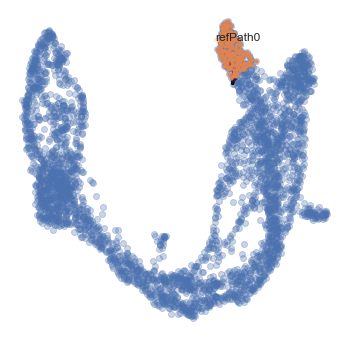




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  3696
Cutoff is  0.05625772238079806
Number of nodes:  4
clusterIDs:  [0, 1, 2, 3]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (1160, 1091)
pair_cellIDs:  (2937, 2135)
pair_cellIDs:  (1501, 722)
pair_cellIDs:  (2540, 2987)
pair_cellIDs:  (866, 2713)
pair_cellIDs:  (1269, 1722)
pair_cellIDs:  (4, 481)
pair_cellIDs:  (2909, 559)
pair_cellIDs:  (2929, 1973)
pair_cellIDs:  (2838, 3371)
pair_cellIDs:  (2209, 2088)
pair_cellIDs:  (297, 978)
pair_cellIDs:  (814, 2094)
pair_cellIDs:  (2893, 195)
pair_cellIDs:  (2879, 1659)
pair_cellIDs:  (503, 3654)
pair_cellIDs:  (118, 1582)
pair_cellIDs:  (908, 685)
pair_cellIDs:  (2346, 3522)
pair_cellIDs:  (1307, 2421)
pair_cellIDs:  (2322, 865)
pair_cellIDs:  (1055, 3102)
pair_cellIDs:  (2567, 134)
pair_cellIDs:  (609, 804)
pair_cellIDs:  (830, 1108)
pair_cellIDs:  (315, 548)
pair_cellIDs:  (1904, 1476)
pair_cellIDs:  (3313, 844)

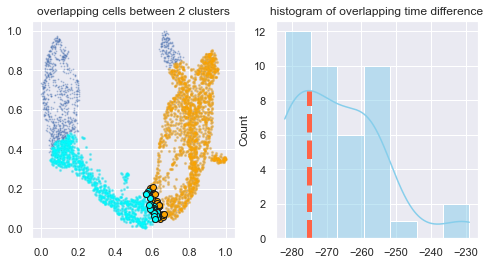

Time shift is:  -276
The overlapping cells are: 
cell  609  from cluster  0  and  804  from cluster  1

Consolidating time between clusters  0  and  2 ...
No close cells between clusters	 (0, 2)

Consolidating time between clusters  0  and  3 ...
pair_cellIDs:  (2956, 2265)
pair_cellIDs:  (1744, 1234)
pair_cellIDs:  (1284, 2338)
pair_cellIDs:  (1008, 583)
pair_cellIDs:  (2878, 170)
pair_cellIDs:  (2288, 718)
pair_cellIDs:  (2750, 2971)
pair_cellIDs:  (821, 1759)
pair_cellIDs:  (1119, 726)
pair_cellIDs:  (1996, 979)
pair_cellIDs:  (197, 994)
pair_cellIDs:  (1959, 1063)
pair_cellIDs:  (761, 852)
pair_cellIDs:  (2975, 2940)
pair_cellIDs:  (3529, 3475)
pair_cellIDs:  (2180, 1636)
pair_cellIDs:  (1601, 3631)
pair_cellIDs:  (3335, 2254)
pair_cellIDs:  (2983, 3532)
pair_cellIDs:  (560, 26)
pair_cellIDs:  (2887, 1088)
pair_cellIDs:  (2458, 2006)
pair_cellIDs:  (2766, 1679)
pair_cellIDs:  (1302, 27)
pair_cellIDs:  (3669, 3290)
pair_cellIDs:  (1107, 291)
pair_cellIDs:  (2427, 3050)
pair_cellIDs:

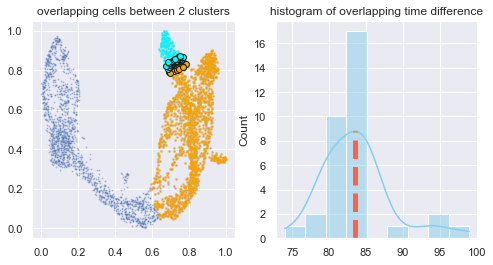

Time shift is:  84
The overlapping cells are: 
cell  3335  from cluster  0  and  2254  from cluster  3

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (1880, 867)
pair_cellIDs:  (3361, 122)
pair_cellIDs:  (1740, 2215)
pair_cellIDs:  (2685, 336)
pair_cellIDs:  (1594, 2169)
pair_cellIDs:  (1414, 1896)
pair_cellIDs:  (1145, 1578)
pair_cellIDs:  (103, 1591)
pair_cellIDs:  (2214, 182)
pair_cellIDs:  (2004, 3686)
pair_cellIDs:  (2979, 2593)
pair_cellIDs:  (2519, 2763)
pair_cellIDs:  (2216, 2437)
pair_cellIDs:  (3107, 3022)
pair_cellIDs:  (3324, 2859)
pair_cellIDs:  (2606, 1569)
pair_cellIDs:  (876, 2772)
pair_cellIDs:  (3326, 3373)
pair_cellIDs:  (2914, 3333)
pair_cellIDs:  (2761, 2053)
pair_cellIDs:  (2565, 250)
pair_cellIDs:  (3256, 346)
pair_cellIDs:  (2802, 3567)
pair_cellIDs:  (2026, 401)
pair_cellIDs:  (3351, 2356)
pair_cellIDs:  (492, 3032)
pair_cellIDs:  (3199, 776)
pair_cellIDs:  (20, 1252)
pair_cellIDs:  (1953, 2411)
pair_cellIDs:  (2853, 1710)
pair_cellIDs:  (16

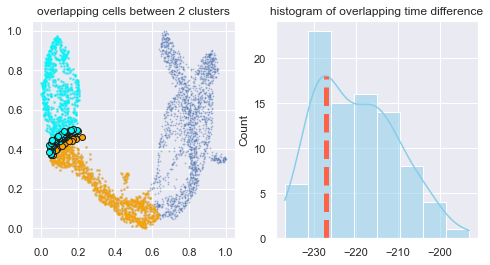

Time shift is:  -227
The overlapping cells are: 
cell  415  from cluster  1  and  1667  from cluster  2

Consolidating time between clusters  1  and  3 ...
No close cells between clusters	 (1, 3)

Consolidating time between clusters  2  and  3 ...
No close cells between clusters	 (2, 3)


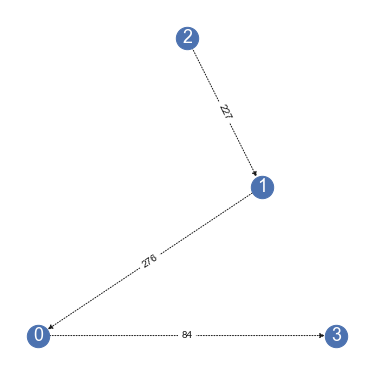

Connected components:  {0, 1, 2, 3}
All nodes adjustment:  {0: 0, 1: -276, 2: -503, 3: 84}


All inter cluster cell time has been resolved.





TypeError: only integer scalar arrays can be converted to a scalar index

time: 2min 50s (started: 2022-05-18 16:10:49 -05:00)


In [169]:
%autoreload 2

cell_time = dict()
dt = 0.01
#t_total = {dt:int(10/dt)} 
t_total = {0.01: 100}
n_repeats = 10

grid = (60, 60)
load_cellDancer = pseudo_time(
    load_cellDancer=load_cellDancer, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    downsample_step=downsample_step,
    n_paths = 4,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

In [159]:
alpha_time  = load_cellDancer[load_cellDancer.clusters == 'Alpha'
                             ][load_cellDancer.gene_name == 'Dcx']['pseudotime']
beta_time = load_cellDancer[load_cellDancer.clusters == 'Beta'
                           ][load_cellDancer.gene_name == 'Dcx']['pseudotime']

alpha_time.max(), beta_time.max()

(0.9942670857894823, 0.9899657142636947)

time: 2.44 s (started: 2022-05-18 14:41:58 -05:00)


In [164]:
a,b = (1,2)

time: 1.1 ms (started: 2022-05-18 15:06:06 -05:00)


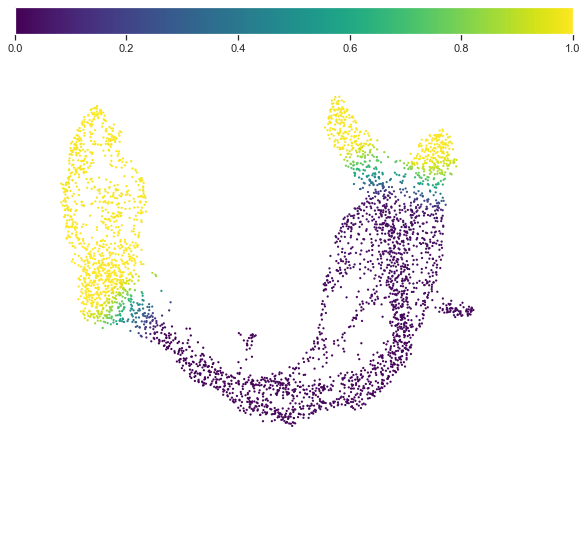

time: 2.07 s (started: 2022-05-18 14:42:01 -05:00)


In [160]:
fig, ax = plt.subplots(figsize=(10,10))
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', 
                           alpha=1,
                           gene_name=None, velocity=False,
                           custom_xlim=xlim, custom_ylim=ylim)
ax.axis('off')
plt.show()

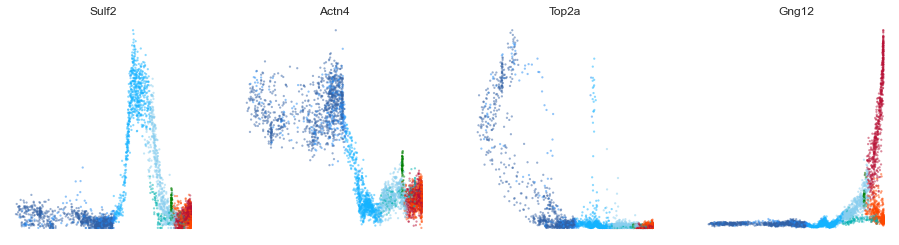

time: 2.88 s (started: 2022-05-18 12:01:45 -05:00)


In [150]:
gene_list=['Sulf2', 'Actn4', 'Top2a','Gng12']

ncols=5
fig = plt.figure(figsize=(20,4))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')